# Exploratory Data Analysis
### This objective of this notebook is to conduct exploratory data analysis for predicting 12 month oil cum for wells in the Delaware Basin.  

In [114]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# My hypothesis is that 12 month oil cum will be related to some geologic metrics, distance of offset wells and completion design parameters. 

### The data is in a geologic csv.  The unique well id from geologic csv will be used to download well attribute data to generate the well data.  The geo and well data will then be combined into a single data frame.

### This initial step is loading the geologic data and making it tidy.

In [115]:
# Load the data
geo_df = pd.read_csv('WFMP UA Value for Linear Regression Analysis.csv')


# Geologic data clean up:  
### Data is not tidy, columns named ZoneAttrName and Value are rows that need to be cast to columns, but first remove unnecessary columns.

In [116]:
# View first few rows
geo_df.head()

,UWI,Well Name,Well Number,Well Label,KB Elev,DF Elev,GL Elev,Spud Date,Completion Date,Current Operator,...,Historical Operator,County,State,SurfLat,SurfLong,BHLatDec,BHLongDec,Zone Name,ZoneAttrName,Value
0,42109326190000,HORSESHOE SPRINGS S,1,HORSESHOE SPRINGS S : 1,NaN,NaN,3317.0,10/13/2013,NaN,BPX OPERATING CO,...,NaN,CULBERSON,TEXAS,31.744014,-104.142364,31.723918,-104.142354,Grid Samples,VARIANCE_WFMP_UA_MRKR_SSTVD,10.51
1,42109326190000,HORSESHOE SPRINGS S,1,HORSESHOE SPRINGS S : 1,NaN,NaN,3317.0,10/13/2013,NaN,BPX OPERATING CO,...,NaN,CULBERSON,TEXAS,31.744014,-104.142364,31.723918,-104.142354,Grid Samples,VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100,0.02
2,42109326190000,HORSESHOE SPRINGS S,1,HORSESHOE SPRINGS S : 1,NaN,NaN,3317.0,10/13/2013,NaN,BPX OPERATING CO,...,NaN,CULBERSON,TEXAS,31.744014,-104.142364,31.723918,-104.142354,Grid Samples,VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity...,16.45
3,42109326190000,HORSESHOE SPRINGS S,1,HORSESHOE SPRINGS S : 1,NaN,NaN,3317.0,10/13/2013,NaN,BPX OPERATING CO,...,NaN,CULBERSON,TEXAS,31.744014,-104.142364,31.723918,-104.142354,Grid Samples,VARIANCE_WFMP Upper A - GROSS,2.42
4,42109326190000,HORSESHOE SPRINGS S,1,HORSESHOE SPRINGS S : 1,NaN,NaN,3317.0,10/13/2013,NaN,BPX OPERATING CO,...,NaN,CULBERSON,TEXAS,31.744014,-104.142364,31.723918,-104.142354,Grid Samples,VARIANCE_WFMP Upper A - NET_DPHI>8,0.05


In [117]:
# Remove unnecessary columns
geo_df.drop(labels=['Well Number', 'Well Label', 'KB Elev', 'DF Elev',
       'GL Elev','Original Operator','Historical Operator', 'County', 'State',
       'SurfLat', 'SurfLong','Zone Name','Completion Date'], axis=1, inplace=True)

In [118]:
geo_df.head()

,UWI,Well Name,Spud Date,Current Operator,BHLatDec,BHLongDec,ZoneAttrName,Value
0,42109326190000,HORSESHOE SPRINGS S,10/13/2013,BPX OPERATING CO,31.723918,-104.142354,VARIANCE_WFMP_UA_MRKR_SSTVD,10.51
1,42109326190000,HORSESHOE SPRINGS S,10/13/2013,BPX OPERATING CO,31.723918,-104.142354,VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100,0.02
2,42109326190000,HORSESHOE SPRINGS S,10/13/2013,BPX OPERATING CO,31.723918,-104.142354,VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity...,16.45
3,42109326190000,HORSESHOE SPRINGS S,10/13/2013,BPX OPERATING CO,31.723918,-104.142354,VARIANCE_WFMP Upper A - GROSS,2.42
4,42109326190000,HORSESHOE SPRINGS S,10/13/2013,BPX OPERATING CO,31.723918,-104.142354,VARIANCE_WFMP Upper A - NET_DPHI>8,0.05


In [119]:
# Pivot the df to cast the ZoneAttrName to columns
geo_df_wide = geo_df.pivot(index='UWI', columns='ZoneAttrName',values='Value').copy()
geo_df_wide.head()

ZoneAttrName,MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100,MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS,MEDIAN_WFMP Upper A - GROSS,MEDIAN_WFMP Upper A - NET_DPHI>8,MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8,MEDIAN_WFMP Upper A - NET_Res>30,MEDIAN_WFMP_UA_MRKR_SSTVD,VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100,VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS,VARIANCE_WFMP Upper A - GROSS,VARIANCE_WFMP Upper A - NET_DPHI>8,VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8,VARIANCE_WFMP Upper A - NET_Res>30,VARIANCE_WFMP_UA_MRKR_SSTVD
UWI,,,,,,,,,,,,,,
42109326190000,5.82,115.92,105.07,53.72,NaN,95.25,-5566.93,0.02,16.45,2.42,0.05,NaN,2.80,10.51
42109326530000,7.77,63.18,84.56,52.09,NaN,67.85,-5467.08,0.05,15.29,0.09,0.86,NaN,2.03,64.85
42109326540000,9.32,48.76,141.75,94.76,86.25,100.22,-6154.35,0.01,0.10,2.83,2.91,1.37,13.71,17.92
42109328220000,8.08,145.63,129.67,78.99,59.00,130.17,-6014.65,0.01,40.64,7.21,3.41,0.00,13.59,1308.80
42109328300000,7.27,86.09,99.33,58.19,NaN,86.12,-5621.27,0.04,29.41,1.59,0.07,NaN,4.92,48.23


In [120]:
# Explore the geo data, NaN
geo_df_wide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 42109326190000 to 42475381870000
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100           996 non-null    float64
 1   MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS    993 non-null    float64
 2   MEDIAN_WFMP Upper A - GROSS                         997 non-null    float64
 3   MEDIAN_WFMP Upper A - NET_DPHI>8                    996 non-null    float64
 4   MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8              859 non-null    float64
 5   MEDIAN_WFMP Upper A - NET_Res>30                    993 non-null    float64
 6   MEDIAN_WFMP_UA_MRKR_SSTVD                           997 non-null    float64
 7   VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100         996 non-null    float64
 8   VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS  993 

### There is some NAN in the geo data, due to not all wells have that data available.  I talked with the geologist and we agreed to proceed with the analysis with the NaN values.
# Get the UWI for the wells and download the data from external source.

In [121]:
# UWI list to get the 12 month cum oil data as well as well attributes, 
# use the UWI from csv below to load into external database for public well data
geo_df_wide.to_csv('UWI.csv')

In [122]:
# Load in the well data from external source
well_df = pd.read_csv('well_data.csv')

In [123]:
# Take a look at how many nulls and data types
well_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unformatted_API_UWI_14               1072 non-null   int64  
 1   ENVOperator                          1072 non-null   object 
 2   FirstProdDate                        1053 non-null   object 
 3   LateralLength_FT                     1000 non-null   float64
 4   ProppantIntensity_LBSPerFT           866 non-null    float64
 5   WaterIntensity_GALPerFT              916 non-null    float64
 6   OilGravity_API                       951 non-null    float64
 7   AvgHzDistAtDrillTimeSameZone_FT      572 non-null    float64
 8   ClosestHzDistAtDrillTimeSameZone_FT  572 non-null    float64
 9   WellName                             1072 non-null   object 
 10  First12MonthOil_BBL                  917 non-null    float64
 11  First12MonthGas_MCF           

In [124]:
well_df.head()

,Unformatted_API_UWI_14,ENVOperator,FirstProdDate,LateralLength_FT,ProppantIntensity_LBSPerFT,WaterIntensity_GALPerFT,OilGravity_API,AvgHzDistAtDrillTimeSameZone_FT,ClosestHzDistAtDrillTimeSameZone_FT,WellName,First12MonthOil_BBL,First12MonthGas_MCF
0,42109328220000,PDC ENERGY,7/1/2015,7411.000,1237.0258,1148.2241,51.0,NaN,NaN,STATE SRO 45-18X19 1H,35960.000,132399.000
1,42389366240000,CHEVRON,12/1/2019,10370.021,NaN,NaN,NaN,1261.262458,763.056321,MONROE 28-39 UNIT C 10H,18669.018,47059.465
2,42389367080000,EOG,8/1/2018,7471.000,2442.3772,1962.7172,48.0,752.442952,752.442952,STATE CREEK 17-8 UNIT 7H,260675.000,1183330.000
3,42389368300000,CHEVRON,12/1/2018,9799.000,2548.8423,2015.3563,43.0,1182.870377,1006.295644,RAGAN SMITH STATE 36-37 UNIT A 7H,205080.000,453275.220
4,42389369700000,DIAMONDBACK,11/1/2018,6300.000,2027.8954,2292.8132,47.0,879.593524,879.593524,MISBEHAVING STATE UNIT C19-19-14 606H,108171.070,294123.120


In [125]:
# After talking to the data provider, NaN for the distance attributes should be set to 2600'
well_df[['AvgHzDistAtDrillTimeSameZone_FT', 'ClosestHzDistAtDrillTimeSameZone_FT']] = well_df[['AvgHzDistAtDrillTimeSameZone_FT', 'ClosestHzDistAtDrillTimeSameZone_FT']].fillna(value=2600)

# Combine geo_df_wide with well_df on API

In [126]:
# make a consistent column name to match rows
old_names = ['Unformatted_API_UWI_14']
new_names = ['API']
well_df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
well_df.columns

Index(['API', 'ENVOperator', 'FirstProdDate', 'LateralLength_FT',
       'ProppantIntensity_LBSPerFT', 'WaterIntensity_GALPerFT',
       'OilGravity_API', 'AvgHzDistAtDrillTimeSameZone_FT',
       'ClosestHzDistAtDrillTimeSameZone_FT', 'WellName',
       'First12MonthOil_BBL', 'First12MonthGas_MCF'],
      dtype='object')

In [127]:
# make a consistent column name to match rows
geo_df_wide.reset_index(inplace=True)
geo_df_wide.columns

Index(['UWI', 'MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'MEDIAN_WFMP Upper A - GROSS', 'MEDIAN_WFMP Upper A - NET_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_Res>30', 'MEDIAN_WFMP_UA_MRKR_SSTVD',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'VARIANCE_WFMP Upper A - GROSS', 'VARIANCE_WFMP Upper A - NET_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_Res>30', 'VARIANCE_WFMP_UA_MRKR_SSTVD'],
      dtype='object', name='ZoneAttrName')

In [128]:
# make a consistent column name to match rows
old_names = ['UWI']
new_names = ['API']
geo_df_wide.rename(columns=dict(zip(old_names, new_names)), inplace=True)
geo_df_wide.columns

Index(['API', 'MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'MEDIAN_WFMP Upper A - GROSS', 'MEDIAN_WFMP Upper A - NET_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_Res>30', 'MEDIAN_WFMP_UA_MRKR_SSTVD',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'VARIANCE_WFMP Upper A - GROSS', 'VARIANCE_WFMP Upper A - NET_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_Res>30', 'VARIANCE_WFMP_UA_MRKR_SSTVD'],
      dtype='object', name='ZoneAttrName')

In [129]:
# convert from API unique indentifier from number to string
well_df.API = well_df.API.astype('str')
geo_df_wide.API = geo_df_wide.API.astype('str')

In [130]:
#df_merged = pd.merge(well_df, geo_df_wide, on=["API","API"])
df_merged = pd.merge(well_df, geo_df_wide, on=["API"])

In [131]:
df_merged.shape

(944, 26)

In [132]:
df_merged.describe()

,LateralLength_FT,ProppantIntensity_LBSPerFT,WaterIntensity_GALPerFT,OilGravity_API,AvgHzDistAtDrillTimeSameZone_FT,ClosestHzDistAtDrillTimeSameZone_FT,First12MonthOil_BBL,First12MonthGas_MCF,MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100,MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS,...,MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8,MEDIAN_WFMP Upper A - NET_Res>30,MEDIAN_WFMP_UA_MRKR_SSTVD,VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100,VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS,VARIANCE_WFMP Upper A - GROSS,VARIANCE_WFMP Upper A - NET_DPHI>8,VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8,VARIANCE_WFMP Upper A - NET_Res>30,VARIANCE_WFMP_UA_MRKR_SSTVD
count,918.000000,808.000000,858.000000,890.000000,944.000000,944.000000,862.000000,8.620000e+02,943.000000,941.000000,...,813.000000,941.000000,944.000000,943.000000,941.000000,944.000000,943.000000,813.000000,941.000000,944.000000
mean,7258.974923,2153.043914,2107.263977,47.171910,1733.930090,1688.788646,156238.185205,6.224645e+05,9.591315,100.765685,...,71.073100,95.057747,-7490.593983,0.569533,34.191137,6.011155,6.896607,4.126052,5.658045,643.133528
std,2389.399966,595.413275,667.209581,4.594306,820.374141,854.151386,76923.461138,4.114028e+05,2.896924,34.961520,...,16.782296,21.057502,658.329444,7.428175,90.464180,11.276048,18.206390,10.133303,15.677595,1366.129622
min,821.000000,0.183055,23.309273,10.000000,190.693018,190.693018,1627.000000,2.400000e+01,-30.340000,12.970000,...,10.070000,7.110000,-8456.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000
25%,4764.000000,1823.165675,1744.697575,44.000000,883.187425,837.991909,100260.520000,3.345412e+05,9.190000,78.200000,...,60.940000,80.750000,-7955.502500,0.010000,1.350000,0.467500,0.435000,0.250000,0.400000,40.667500
50%,7320.000000,2286.283600,2115.365600,47.000000,1625.905176,1533.808920,145517.000000,5.145880e+05,9.960000,94.520000,...,70.180000,90.480000,-7637.330000,0.020000,6.920000,1.960000,1.640000,0.940000,1.550000,181.280000
75%,9592.750000,2510.029400,2436.680975,49.000000,2600.000000,2600.000000,201230.982500,8.311485e+05,10.710000,116.260000,...,82.730000,109.290000,-7235.947500,0.080000,27.060000,6.037500,5.945000,2.850000,4.620000,520.532500
max,20053.000000,5043.544000,7635.866000,70.000000,2636.737658,2636.737658,432672.000000,3.270669e+06,14.440000,251.480000,...,110.960000,145.260000,-3749.360000,212.150000,1532.790000,110.260000,294.150000,131.030000,242.160000,12541.330000


In [133]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 943
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   API                                                 944 non-null    object 
 1   ENVOperator                                         944 non-null    object 
 2   FirstProdDate                                       926 non-null    object 
 3   LateralLength_FT                                    918 non-null    float64
 4   ProppantIntensity_LBSPerFT                          808 non-null    float64
 5   WaterIntensity_GALPerFT                             858 non-null    float64
 6   OilGravity_API                                      890 non-null    float64
 7   AvgHzDistAtDrillTimeSameZone_FT                     944 non-null    float64
 8   ClosestHzDistAtDrillTimeSameZone_FT                 944 non-null    float64
 9  

In [135]:
# remove unnecessary columns
df_merged.drop(columns=['WellName'], inplace=True)

# Dataset has been cleaned up, perform EDA

### Data appears log-normally distributed

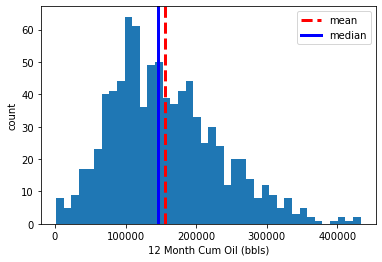

In [141]:
#Create a histogram of 12 Month Cum Oil
plt.hist(df_merged['First12MonthOil_BBL'], bins=40)
plt.ylabel('count')
plt.xlabel('12 Month Cum Oil (bbls)')
plt.axvline(df_merged['First12MonthOil_BBL'].mean(), color='red', linestyle='--', linewidth=3, label='mean')
plt.axvline(df_merged['First12MonthOil_BBL'].median(), color='blue', linestyle='solid', linewidth=3, label='median')
plt.legend()
plt.show()

In [142]:
# select numeric columns only and get column names to arrange columns with 12 Month Cum Oil first
df_num = df_merged.select_dtypes(include=['float64'])
names = df_num.columns
names

Index(['LateralLength_FT', 'ProppantIntensity_LBSPerFT',
       'WaterIntensity_GALPerFT', 'OilGravity_API',
       'AvgHzDistAtDrillTimeSameZone_FT',
       'ClosestHzDistAtDrillTimeSameZone_FT', 'First12MonthOil_BBL',
       'First12MonthGas_MCF', 'MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'MEDIAN_WFMP Upper A - GROSS', 'MEDIAN_WFMP Upper A - NET_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_Res>30', 'MEDIAN_WFMP_UA_MRKR_SSTVD',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'VARIANCE_WFMP Upper A - GROSS', 'VARIANCE_WFMP Upper A - NET_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_Res>30', 'VARIANCE_WFMP_UA_MRKR_SSTVD'],
      dtype='object')

In [143]:
# Create a GOR attribute, more gassy wells might correlate to lower oil cum
#df_num['gor scf/stb'] = df_num['First12MonthGas_MCF']/df_num['First12MonthOil_BBL']
gor = df_num['First12MonthGas_MCF']/df_num['First12MonthOil_BBL']*1000
df_num.loc[:, 'gor scf/stb'] = gor

C:\Users\asclark\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\asclark\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [144]:
df_num.head()

,LateralLength_FT,ProppantIntensity_LBSPerFT,WaterIntensity_GALPerFT,OilGravity_API,AvgHzDistAtDrillTimeSameZone_FT,ClosestHzDistAtDrillTimeSameZone_FT,First12MonthOil_BBL,First12MonthGas_MCF,MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100,MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS,...,MEDIAN_WFMP Upper A - NET_Res>30,MEDIAN_WFMP_UA_MRKR_SSTVD,VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100,VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS,VARIANCE_WFMP Upper A - GROSS,VARIANCE_WFMP Upper A - NET_DPHI>8,VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8,VARIANCE_WFMP Upper A - NET_Res>30,VARIANCE_WFMP_UA_MRKR_SSTVD,gor scf/stb
0,7411.000,1237.0258,1148.2241,51.0,2600.000000,2600.000000,35960.000,132399.000,8.08,145.63,...,130.17,-6014.65,0.01,40.64,7.21,3.41,0.00,13.59,1308.80,3681.840934
1,10370.021,NaN,NaN,NaN,1261.262458,763.056321,18669.018,47059.465,9.94,110.30,...,90.29,-7886.27,0.01,12.44,0.24,1.56,2.15,1.60,302.59,2520.725247
2,7471.000,2442.3772,1962.7172,48.0,752.442952,752.442952,260675.000,1183330.000,9.47,81.96,...,99.81,-7139.56,0.02,6.64,4.33,0.75,0.10,3.27,7.04,4539.484032
3,9799.000,2548.8423,2015.3563,43.0,1182.870377,1006.295644,205080.000,453275.220,10.29,107.95,...,85.47,-8000.61,0.07,37.53,5.03,6.17,1.39,2.61,478.22,2210.236103
4,6300.000,2027.8954,2292.8132,47.0,879.593524,879.593524,108171.070,294123.120,11.19,52.49,...,90.69,-8114.49,0.01,0.61,2.12,0.19,0.46,0.34,5179.07,2719.055289


In [145]:
names = ['First12MonthOil_BBL', 'LateralLength_FT', 'ProppantIntensity_LBSPerFT',
       'WaterIntensity_GALPerFT', 'OilGravity_API',
       'AvgHzDistAtDrillTimeSameZone_FT',
       'ClosestHzDistAtDrillTimeSameZone_FT', 'MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'MEDIAN_WFMP Upper A - GROSS', 'MEDIAN_WFMP Upper A - NET_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_Res>30', 'MEDIAN_WFMP_UA_MRKR_SSTVD',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'VARIANCE_WFMP Upper A - GROSS', 'VARIANCE_WFMP Upper A - NET_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_Res>30', 'VARIANCE_WFMP_UA_MRKR_SSTVD','gor scf/stb']
df_num = df_num[names]
df_num.columns

Index(['First12MonthOil_BBL', 'LateralLength_FT', 'ProppantIntensity_LBSPerFT',
       'WaterIntensity_GALPerFT', 'OilGravity_API',
       'AvgHzDistAtDrillTimeSameZone_FT',
       'ClosestHzDistAtDrillTimeSameZone_FT',
       'MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'MEDIAN_WFMP Upper A - GROSS', 'MEDIAN_WFMP Upper A - NET_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8',
       'MEDIAN_WFMP Upper A - NET_Res>30', 'MEDIAN_WFMP_UA_MRKR_SSTVD',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100',
       'VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS',
       'VARIANCE_WFMP Upper A - GROSS', 'VARIANCE_WFMP Upper A - NET_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_GR>75_DPHI>8',
       'VARIANCE_WFMP Upper A - NET_Res>30', 'VARIANCE_WFMP_UA_MRKR_SSTVD',
       'gor scf/stb'],
      dtype='object')

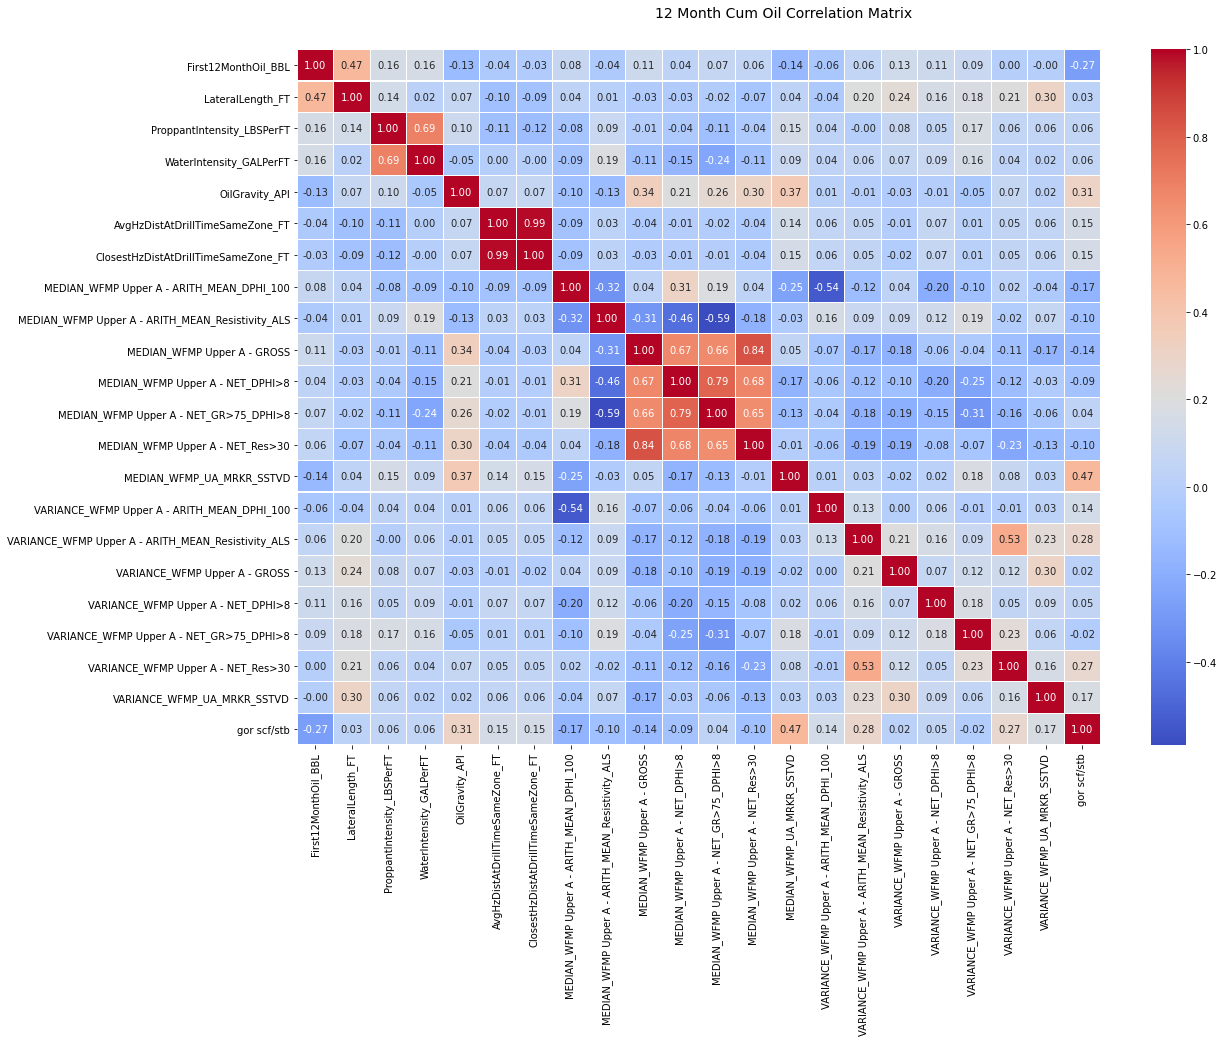

In [146]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(18, 12))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('12 Month Cum Oil Correlation Matrix', fontsize=14)

### There are some highly correlated variables:
water and proppant intensity = 0.69
average and closest offset distances = 0.99
Median WFMP NET PHI>9, WFMP Gross, 




In [172]:
corr_pairs = corrmat.unstack()
strong_pairs = corr_pairs[(abs(corr_pairs) > 0.5) & (abs(corr_pairs) < 1.0)]
strong_pairs


ProppantIntensity_LBSPerFT                          WaterIntensity_GALPerFT                               0.693280
WaterIntensity_GALPerFT                             ProppantIntensity_LBSPerFT                            0.693280
AvgHzDistAtDrillTimeSameZone_FT                     ClosestHzDistAtDrillTimeSameZone_FT                   0.986569
ClosestHzDistAtDrillTimeSameZone_FT                 AvgHzDistAtDrillTimeSameZone_FT                       0.986569
MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100           VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100          -0.540175
MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS    MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8               -0.593420
MEDIAN_WFMP Upper A - GROSS                         MEDIAN_WFMP Upper A - NET_DPHI>8                      0.668159
                                                    MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8                0.664477
                                                    MEDIAN_WFMP Upper A - NET_Re

In [180]:
hi_corr_names = strong_pairs.index
hi_corr_names

MultiIndex([(                        'ProppantIntensity_LBSPerFT', ...),
            (                           'WaterIntensity_GALPerFT', ...),
            (                   'AvgHzDistAtDrillTimeSameZone_FT', ...),
            (               'ClosestHzDistAtDrillTimeSameZone_FT', ...),
            (         'MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100', ...),
            (  'MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS', ...),
            (                       'MEDIAN_WFMP Upper A - GROSS', ...),
            (                       'MEDIAN_WFMP Upper A - GROSS', ...),
            (                       'MEDIAN_WFMP Upper A - GROSS', ...),
            (                  'MEDIAN_WFMP Upper A - NET_DPHI>8', ...),
            (                  'MEDIAN_WFMP Upper A - NET_DPHI>8', ...),
            (                  'MEDIAN_WFMP Upper A - NET_DPHI>8', ...),
            (            'MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8', ...),
            (            'MEDIAN_WFMP Upper A - NET

In [182]:
cols = ['ProppantIntensity_LBSPerFT','WaterIntensity_GALPerFT', 'AvgHzDistAtDrillTimeSameZone_FT','ClosestHzDistAtDrillTimeSameZone_FT', 'MEDIAN_WFMP Upper A - ARITH_MEAN_DPHI_100','MEDIAN_WFMP Upper A - ARITH_MEAN_Resistivity_ALS','MEDIAN_WFMP Upper A - GROSS','MEDIAN_WFMP Upper A - NET_DPHI>8','MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8','MEDIAN_WFMP Upper A - NET_Res>30','VARIANCE_WFMP Upper A - ARITH_MEAN_DPHI_100','VARIANCE_WFMP Upper A - ARITH_MEAN_Resistivity_ALS','VARIANCE_WFMP Upper A - NET_Res>30']
df_strong =df_num[cols]

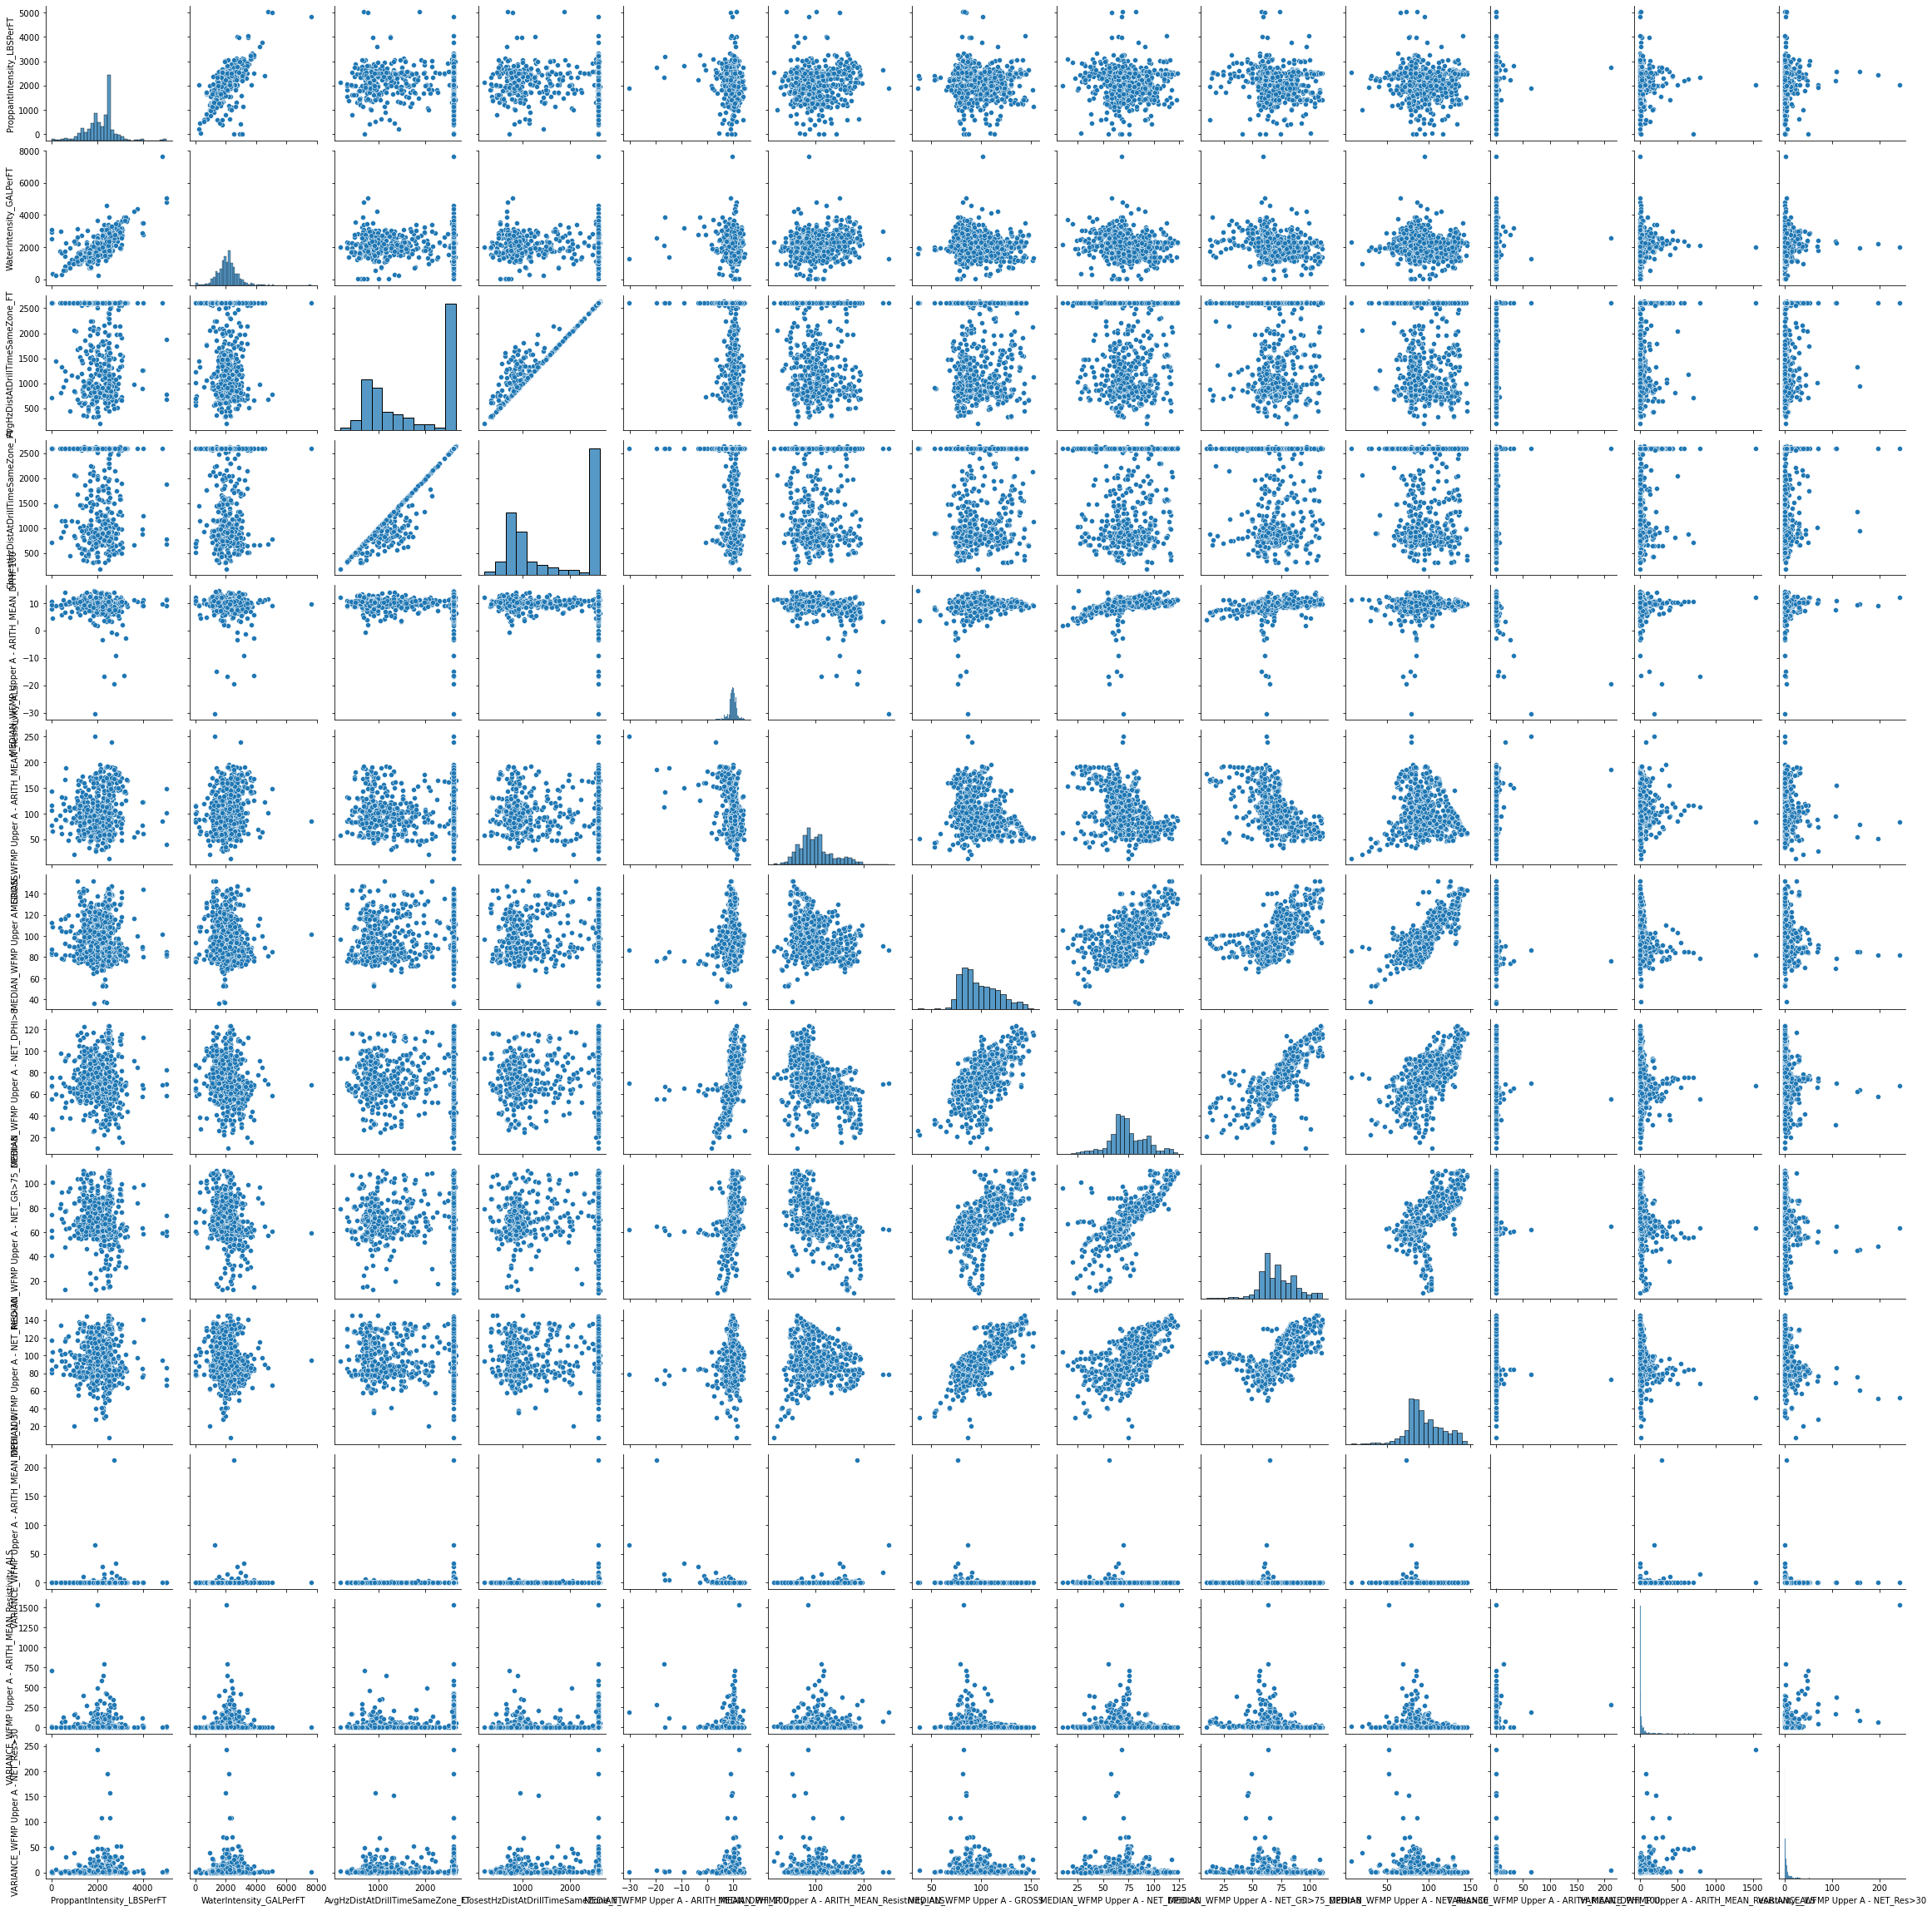

In [183]:
#Create a pairplot for highly correlated numeric variables with 0.5 < correlation < -0.5 
sns.pairplot(df_strong,  palette='Set1')
plt.show()

## Some variables are highly correlated

### Visualize notable correlations

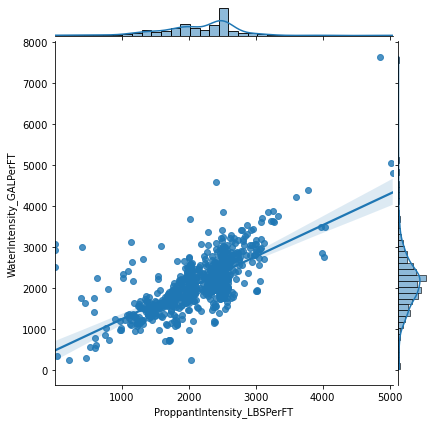

In [186]:
#Plot relationship between Water and sand intensity in the completion
sns.jointplot(x='ProppantIntensity_LBSPerFT',y='WaterIntensity_GALPerFT', data=df_strong, kind="reg",height=6,ratio=10);

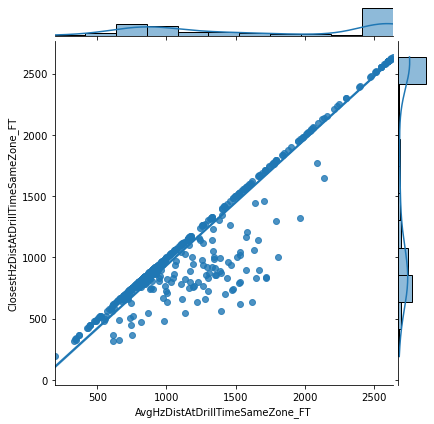

In [187]:
#Plot relationship between avg hx distance and closeset Hz distance
sns.jointplot(x='AvgHzDistAtDrillTimeSameZone_FT',y='ClosestHzDistAtDrillTimeSameZone_FT', data=df_strong, kind="reg",height=6,ratio=10);

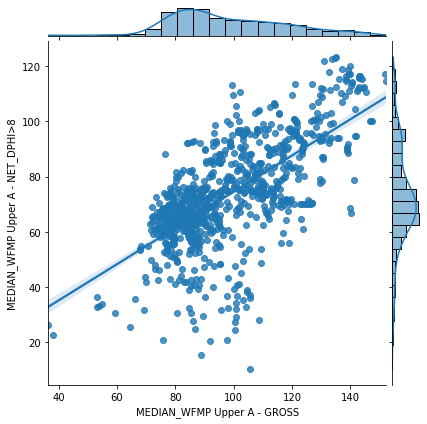

In [190]:
#Plot relationship between geologic log parameters
sns.jointplot(x='MEDIAN_WFMP Upper A - GROSS',y='MEDIAN_WFMP Upper A - NET_DPHI>8', data=df_strong, kind="reg",height=6,ratio=10);

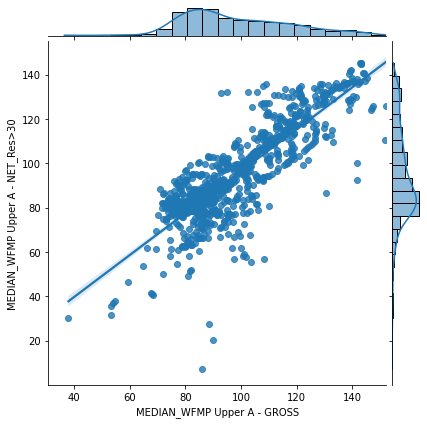

In [191]:
#Plot relationship between geologic log parameters
sns.jointplot(x='MEDIAN_WFMP Upper A - GROSS',y='MEDIAN_WFMP Upper A - NET_Res>30', data=df_strong, kind="reg",height=6,ratio=10);

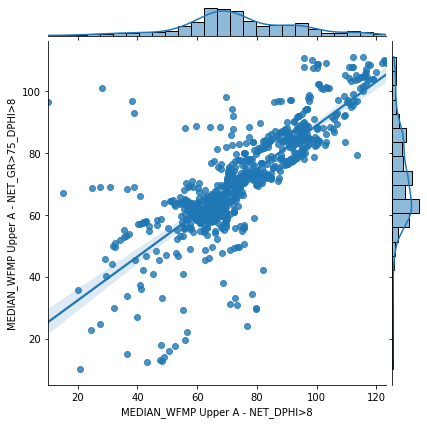

In [192]:
#Plot relationship between geologic log parameters
sns.jointplot(x='MEDIAN_WFMP Upper A - NET_DPHI>8',y='MEDIAN_WFMP Upper A - NET_GR>75_DPHI>8', data=df_strong, kind="reg",height=6,ratio=10);

# Correlations
The EDA analysis of the variables above reveal that the proppant intensity and water intensity of the completion are correlated.  This makes sense because to increase the sand intensity, it is also physically required to increase the water intentity with the completion designs used on the wells.  The average distance to the closest offset and the minimum distance to the closest offset are obviously highly correlated.

The geologic properties that are derived from well logs using pay cutoffs are also highly correclated.  For example the median net pay with a gamma ray cut off of 75 and density porosity greater than 8% is highly correlated to the median net pay with density porosity > 8%.  The only difference is the addition pay cut off of gamma ray.  

In the next phase I'll need to remove these highly correlated variables.